## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


### 2. Load the dataset and display a sample of five rows of the data frame.

In [392]:
data = "./data/heart_2020_cleaned.csv"
df = pd.read_csv(data)


In [393]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [394]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [395]:
# Check the shape of the data
df.shape



(319795, 18)

In [396]:
# General info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [397]:
# Statistical summary of the dataset
df.describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [398]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [399]:
df.describe(include='all')


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [400]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [401]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [402]:
df.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [403]:
# Check for missing values
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)




HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


In [404]:
# Drop rows with missing values if any
df = df.dropna()
df.shape


(319795, 18)

#Here there is no change in Shape

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [405]:
df = pd.read_csv(data)
len(df[df.duplicated()])


18078

In [406]:
# Alternate Solution
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 18078


In [407]:
# Drop duplicate rows
df = df.drop_duplicates()
#df.drop_duplicates(inplace=True)

In [408]:
#Shape after dropping the duplicates
df.shape


(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

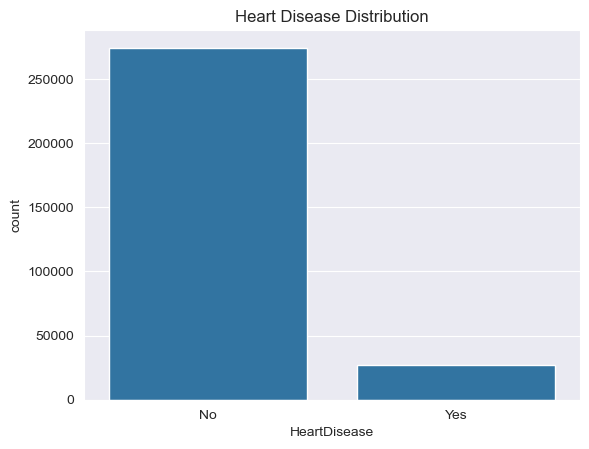

In [409]:
# Distribution of target variable 'HeartDisease'
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show()


<Axes: ylabel='count'>

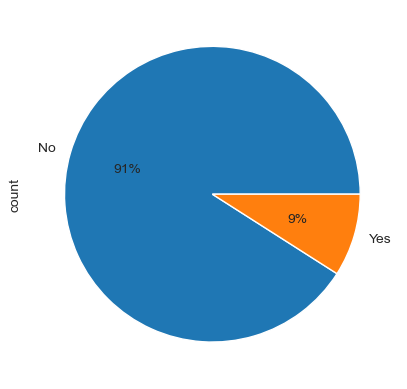

In [410]:
# Alternate Solution
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.0f%%')

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [411]:
# Categorical Values/ Features in the DataSet
#categorical_features = []
#categorical_features = df.select_dtypes(include='object')
df = pd.read_csv(data)
categorical_features = df.select_dtypes(include=[np.object_])

In [412]:
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [413]:
# Categorical features in the dataset
categorical_features = df.select_dtypes(include='O')
print(categorical_features.columns)

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


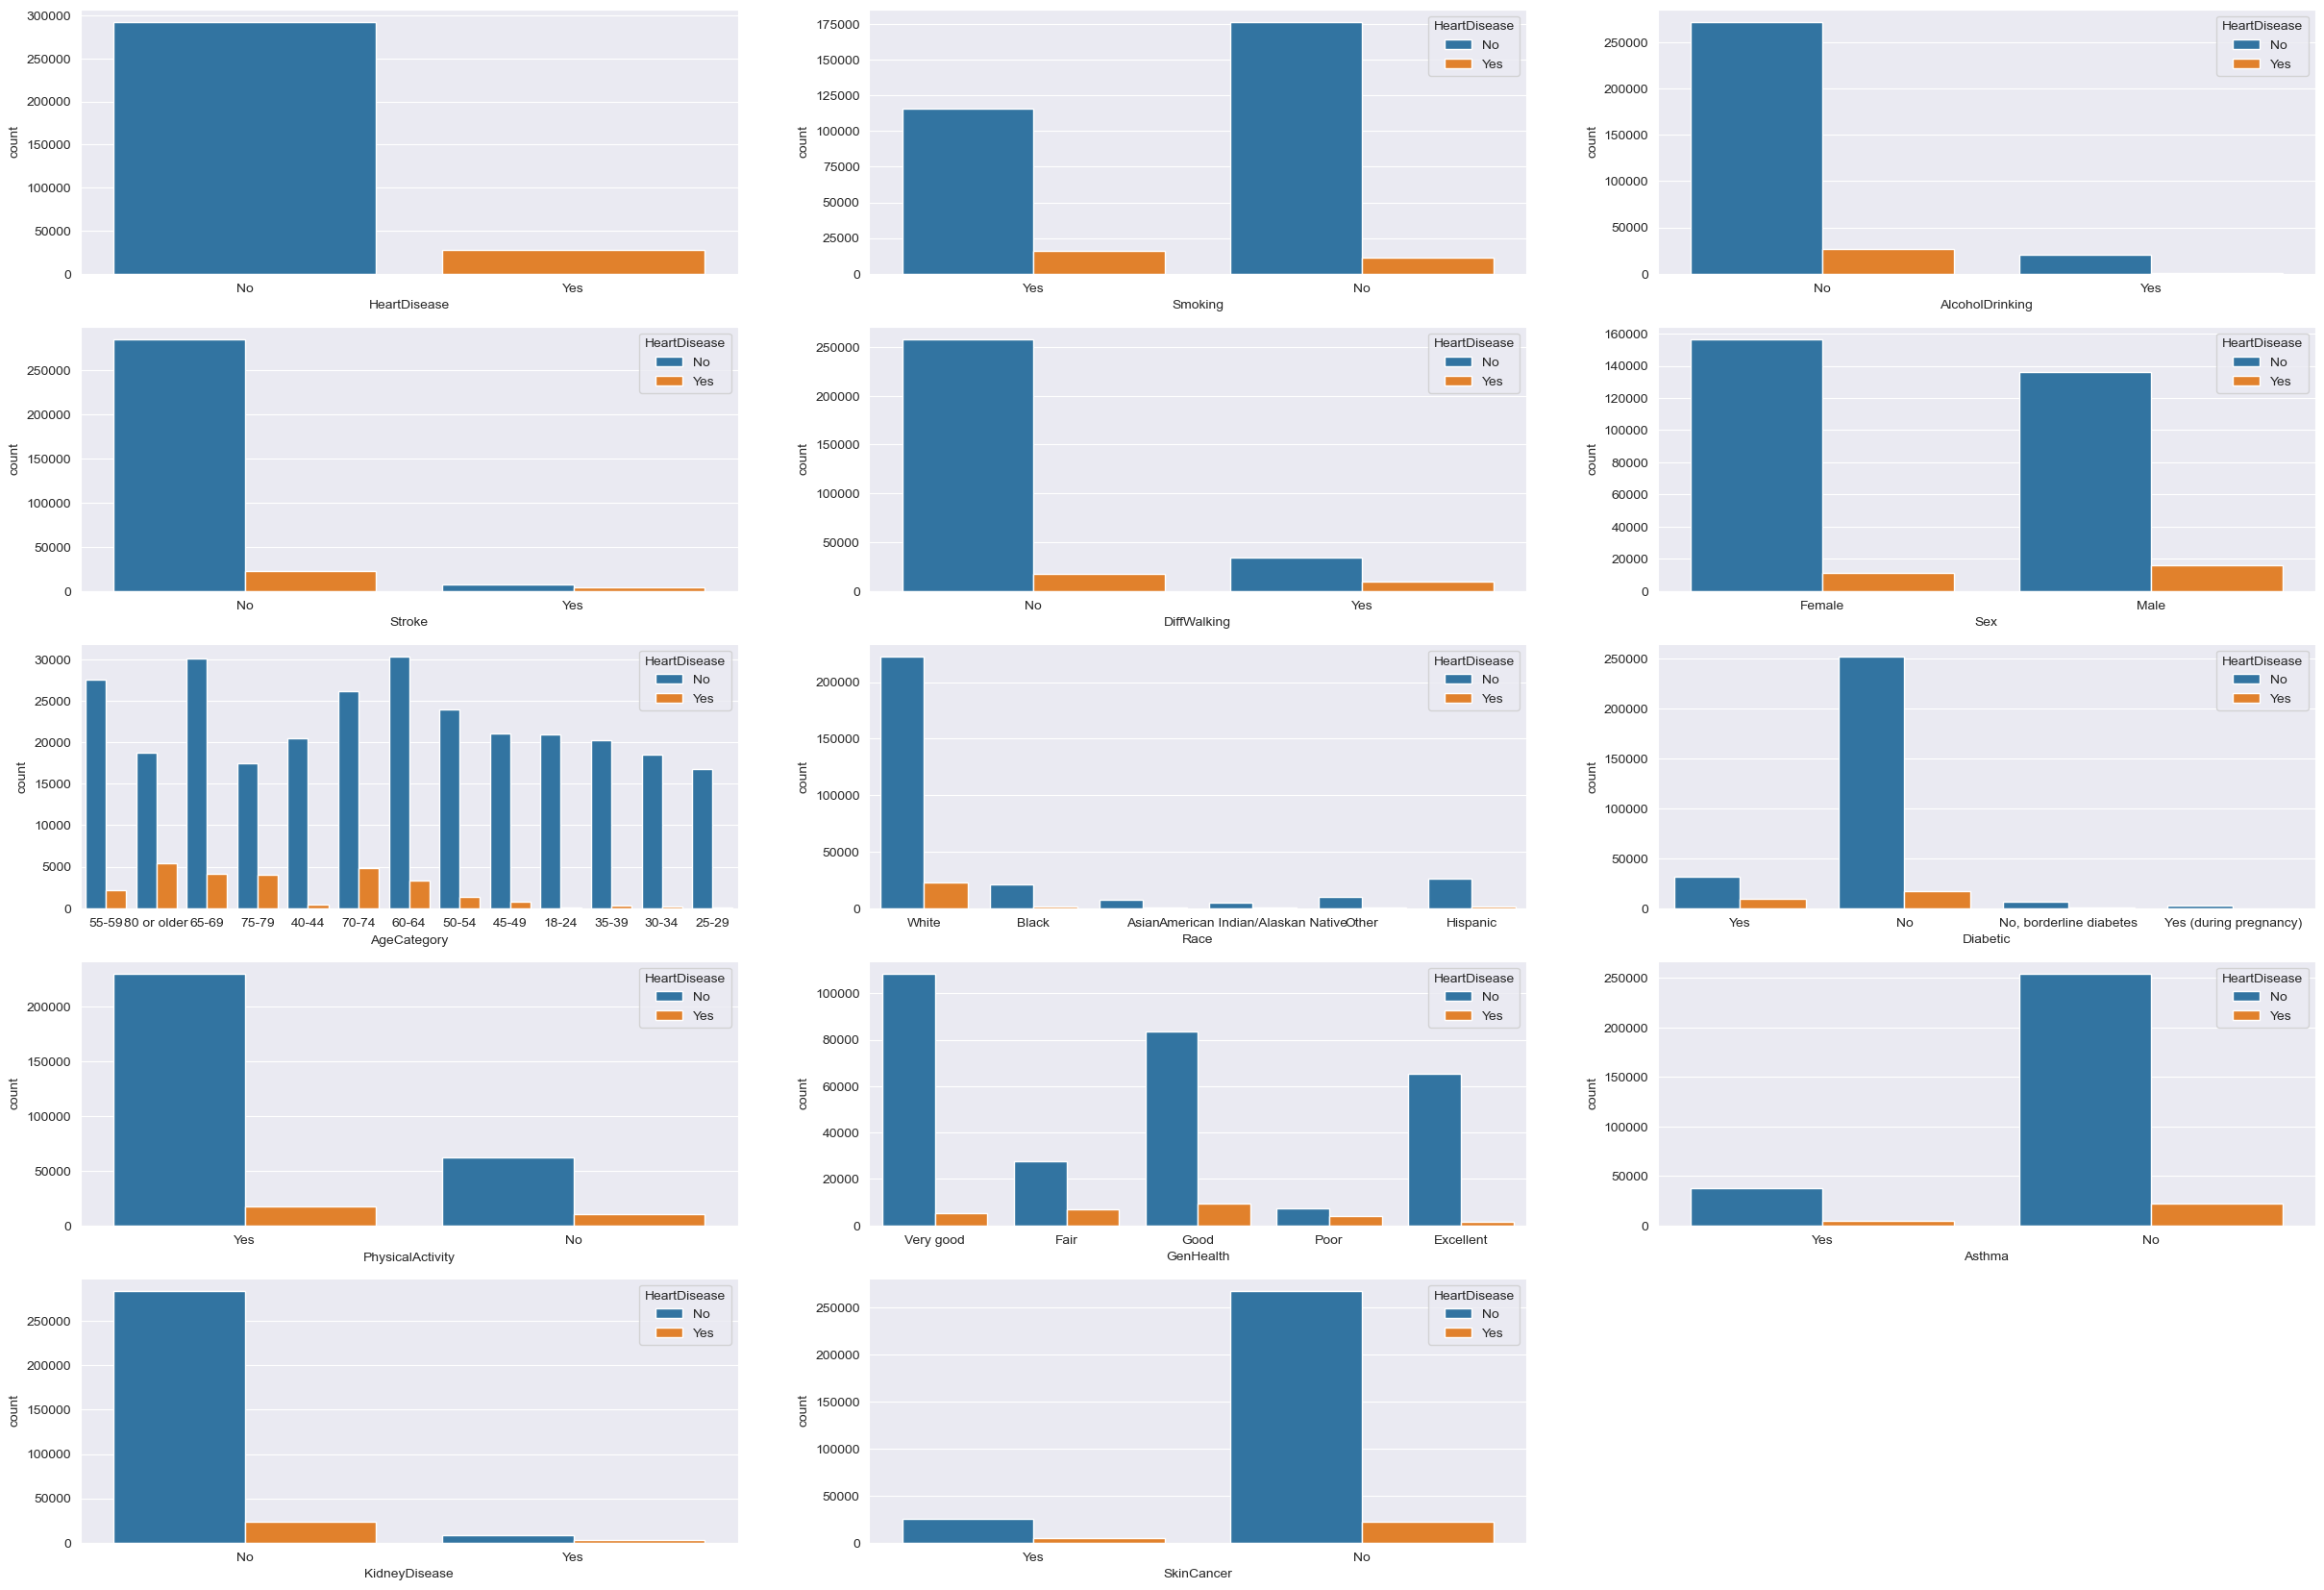

In [414]:
# Plot Distributions
i = 1
plt.figure(figsize=(30, 25))
for feature in categorical_features:
    plt.subplot(6, 3, i)
    #sns.countplot(df[feature], hue=categorical_features[feature])
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    i = i + 1

    


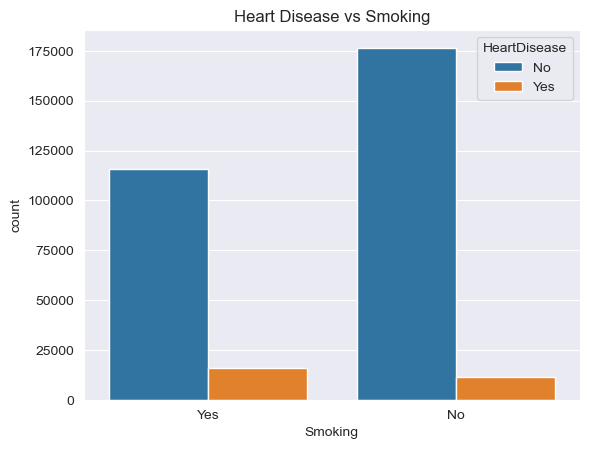

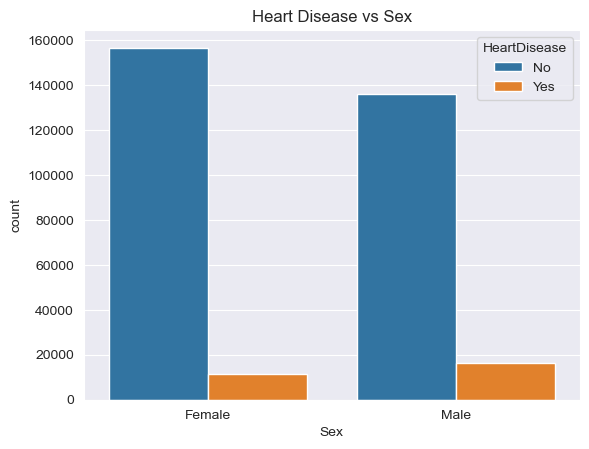

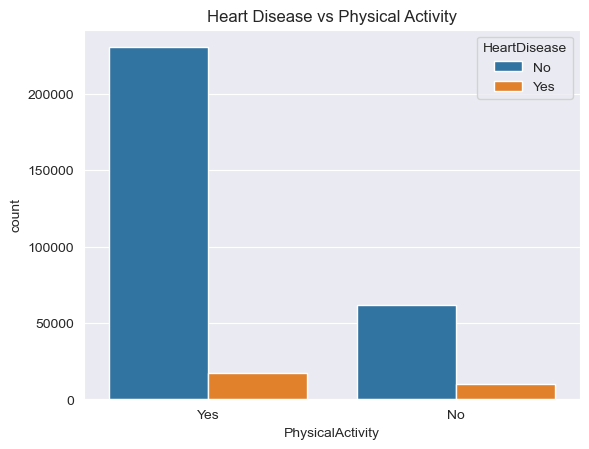

In [415]:
# Alternatively Visualizing the distribution of 'HeartDisease' across various categorical features
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title('Heart Disease vs Smoking')
plt.show()

sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease vs Sex')
plt.show()

sns.countplot(x='PhysicalActivity', hue='HeartDisease', data=df)
plt.title('Heart Disease vs Physical Activity')
plt.show()


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [416]:
# Unique Column with 'Diabetic"
df.Diabetic.unique()


array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [417]:
df.Diabetic = df.Diabetic.replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})

In [418]:
df.Diabetic

0         Yes
1          No
2         Yes
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: Diabetic, Length: 319795, dtype: object

In [419]:
df.Diabetic.value_counts()

Diabetic
No     276434
Yes     43361
Name: count, dtype: int64

In [420]:
# Check unique values in the 'Diabetic' column
df = pd.read_csv(data)

print(df['Diabetic'].unique())

# Replace 'Yes (during pregnancy)' with 'Yes' and 'No, borderline diabetes' with 'No'
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})


['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [421]:
df['Diabetic'].value_counts()

Diabetic
No     276434
Yes     43361
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [422]:
df = pd.read_csv(data)

df.HeartDisease.unique()

array(['No', 'Yes'], dtype=object)

In [423]:
df.HeartDisease = df.HeartDisease.replace({'No': 0, 'Yes': 1})

In [424]:
df.value_counts()


HeartDisease  BMI    Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  DiffWalking  Sex     AgeCategory  Race      Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer
0             27.44  No       No               No      0.0             0.0           No           Female  65-69        White     No        Yes               Very good  7.0        No      No             No            16
              26.63  No       No               No      0.0             0.0           No           Female  65-69        White     No        Yes               Very good  8.0        No      No             No            15
              24.41  No       No               No      0.0             0.0           No           Male    55-59        White     No        Yes               Excellent  7.0        No      No             No            14
                                                                                                          18-24        White     N

In [425]:
df.HeartDisease.unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64>

In [426]:
df.HeartDisease.value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [427]:
# Replace 'No' with 0 and 'Yes' with 1 in the target column 'HeartDisease'
#df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})
df = pd.read_csv(data)
# Alternatively
object_type_variable = [i for i in df[['AgeCategory', 'Race', 'GenHealth']] if df.dtypes[i] == object]
object_type_variable


['AgeCategory', 'Race', 'GenHealth']

In [428]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

def encoder(df):
    for i in object_type_variable:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
        


In [429]:
encoder(df)


In [430]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,False,True,False,False,False,False,False,True,False,True,True,False,True
1,20.34,0.0,0.0,12,5,4,7.0,False,False,False,True,False,False,False,False,False,True,False,False,False
2,26.58,20.0,30.0,9,5,1,8.0,False,True,False,False,False,True,False,True,False,True,True,False,False
3,24.21,0.0,0.0,11,5,2,6.0,False,False,False,False,False,False,False,False,False,False,False,False,True
4,23.71,28.0,0.0,4,5,4,8.0,False,False,False,False,True,False,False,False,False,True,False,False,False


In [431]:
# Alternatively Label encoding for categorical columns
df = pd.read_csv(data)

df['AgeCategory'] = df['AgeCategory'].astype('category').cat.codes
df['Race'] = df['Race'].astype('category').cat.codes
df['GenHealth'] = df['GenHealth'].astype('category').cat.codes

# Dummy encoding for the rest of the columns
df = pd.get_dummies(df, drop_first=True)


In [432]:
df.head(5)


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,False,True,False,False,False,False,False,True,False,True,True,False,True
1,20.34,0.0,0.0,12,5,4,7.0,False,False,False,True,False,False,False,False,False,True,False,False,False
2,26.58,20.0,30.0,9,5,1,8.0,False,True,False,False,False,True,False,True,False,True,True,False,False
3,24.21,0.0,0.0,11,5,2,6.0,False,False,False,False,False,False,False,False,False,False,False,False,True
4,23.71,28.0,0.0,4,5,4,8.0,False,False,False,False,True,False,False,False,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [433]:
# Target variable (y) and feature set (X)
df = pd.read_csv(data)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [434]:
X.head()


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [435]:
y.head()


0    No
1    No
2    No
3    No
4    No
Name: HeartDisease, dtype: object

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [436]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Print the shapes of the train and test sets
print(f"Training X data shape: {X_train.shape}")
print(f"Test X data shape: {X_test.shape}")


Training X data shape: (223856, 17)
Test X data shape: (95939, 17)


In [437]:
print(f"Training y data shape: {y_train.shape}")
print(f"Test y data shape: {y_test.shape}")


Training y data shape: (223856,)
Test y data shape: (95939,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [438]:
# Convert binary categorical columns to 0 and 1
df = pd.read_csv(data)

binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Map 'Yes' to 1 and 'No' to 0, also handle 'Male' to 1 and 'Female' to 0 for the 'Sex' column
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}))

# Check if all these columns have been converted properly
print(df[binary_columns].head())


   Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  Diabetic  \
0        1                0       0            0    0       1.0   
1        0                0       1            0    0       0.0   
2        1                0       0            0    1       1.0   
3        0                0       0            0    0       0.0   
4        0                0       0            1    0       0.0   

   PhysicalActivity  Asthma  KidneyDisease  SkinCancer  
0                 1       1              0           1  
1                 1       0              0           0  
2                 1       1              0           0  
3                 0       0              0           1  
4                 1       0              0           0  


In [439]:
# Label Encoding for ordinal columns like 'AgeCategory', 'GenHealth'
df['AgeCategory'] = df['AgeCategory'].astype('category').cat.codes
df['GenHealth'] = df['GenHealth'].astype('category').cat.codes


In [440]:
# One-Hot Encoding for columns like 'Race' (use drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Race'], drop_first=True)

# Verify the transformation
print(df.head())


  HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           No  16.60        1                0       0             3.0   
1           No  20.34        0                0       1             0.0   
2           No  26.58        1                0       0            20.0   
3           No  24.21        0                0       0             0.0   
4           No  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  ...  GenHealth  SleepTime  \
0          30.0            0    0            7  ...          4        5.0   
1           0.0            0    0           12  ...          4        7.0   
2          30.0            0    1            9  ...          1        8.0   
3           0.0            0    0           11  ...          2        6.0   
4           0.0            1    0            4  ...          4        8.0   

   Asthma  KidneyDisease  SkinCancer  Race_Asian  Race_Black  Race_Hispanic  \
0      

In [441]:
# Check the data types of all columns to ensure everything is numeric
print(df.dtypes)


HeartDisease         object
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory            int8
Diabetic            float64
PhysicalActivity      int64
GenHealth              int8
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
Race_Asian             bool
Race_Black             bool
Race_Hispanic          bool
Race_Other             bool
Race_White             bool
dtype: object


In [442]:
# Separate features (X) and target (y)
X = df.drop('HeartDisease', axis=1)  # Assuming 'HeartDisease' is your target variable
y = df['HeartDisease']


In [443]:
# Split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (223856, 21), X_test shape: (95939, 21)


In [444]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns for both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shape of the scaled data
print(X_train_scaled.shape, X_test_scaled.shape)


(223856, 21) (95939, 21)


In [445]:
##This code from Faculty is not working, so have added above code
#ss = StandardScaler()

#X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
#X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])
#X_train.head(2)
#X_test.head(2)

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# X and y are already defined with your features and labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Handle missing values with SimpleImputer (using mean to fill missing values)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize models
logreg = LogisticRegression()
rf = RandomForestClassifier()

# Define the evaluate_model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate models
logreg_accuracy = evaluate_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)
rf_accuracy = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

# Print the accuracies
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Logistic Regression Accuracy: 0.9151
Random Forest Accuracy: 0.9070


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [447]:
df = pd.read_csv(data)
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [448]:
from sklearn.preprocessing import LabelEncoder

# Columns with categorical data that need to be encoded
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
                       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 
                       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

#df = pd.read_csv(data)

# Check if it works correctly
print(df[categorical_columns].head())


   Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  AgeCategory  Race  \
0        1                0       0            0    0            7     5   
1        0                0       1            0    0           12     5   
2        1                0       0            0    1            9     5   
3        0                0       0            0    0           11     5   
4        0                0       0            1    0            4     5   

   Diabetic  PhysicalActivity  GenHealth  Asthma  KidneyDisease  SkinCancer  
0         2                 1          4       1              0           1  
1         0                 1          4       0              0           0  
2         2                 1          1       1              0           0  
3         0                 0          2       0              0           1  
4         0                 1          4       0              0           0  


In [449]:
# One-Hot Encoding for multi-class categorical columns (AgeCategory, Race)
df = pd.get_dummies(df, columns=['AgeCategory', 'Race'], drop_first=True)

# Check the result after One-Hot Encoding
print(df.head())


  HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0           No  16.60        1                0       0             3.0   
1           No  20.34        0                0       1             0.0   
2           No  26.58        1                0       0            20.0   
3           No  24.21        0                0       0             0.0   
4           No  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  Diabetic  ...  AgeCategory_8  \
0          30.0            0    0         2  ...          False   
1           0.0            0    0         0  ...          False   
2          30.0            0    1         2  ...          False   
3           0.0            0    0         0  ...          False   
4           0.0            1    0         0  ...          False   

   AgeCategory_9  AgeCategory_10  AgeCategory_11  AgeCategory_12  Race_1  \
0          False           False           False           False   Fal

In [450]:
# 1. Define X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# 2. Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standardize the data (since many models are sensitive to feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Now you can proceed to evaluate the models
# Define your models (Logistic Regression, KNN, Random Forest, etc.)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Example model - Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate model
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9138


Logistic Regression Accuracy: 0.9151
KNN Accuracy: 0.9057
Naive Bayes Accuracy: 0.7093
Decision Tree Accuracy: 0.8646
Random Forest Accuracy: 0.9061
AdaBoost Accuracy: 0.9154
Gradient Boosting Accuracy: 0.9159
Stacked Classifier Accuracy: 0.9154

Model Comparison:
Logistic Regression: 0.9151
KNN: 0.9057
Naive Bayes: 0.7093
Decision Tree: 0.8646
Random Forest: 0.9061
AdaBoost: 0.9154
Gradient Boosting: 0.9159
Stacked Classifier: 0.9154


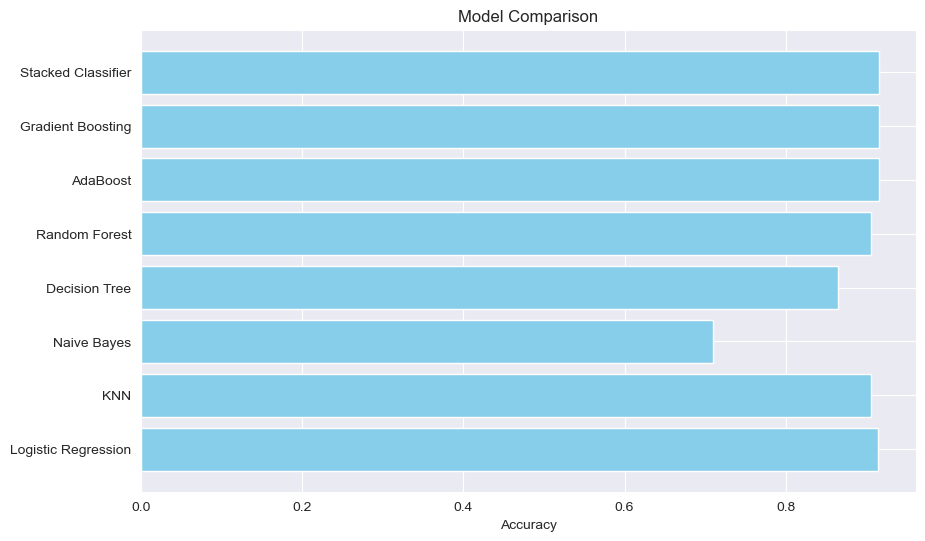

In [451]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# 1. Split the data (Assuming df is your dataframe with target 'HeartDisease')
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Define the models for training
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a machine learning model by fitting it with the training data,
    making predictions on the test set, and returning the accuracy score.
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    return accuracy

# 3. Train and evaluate each model
model_accuracies = {}
for model_name, model in models.items():
    accuracy = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# 4. Stacked Classifier - A model that combines the predictions of other models
# Using a simple stacking classifier with Logistic Regression as the final estimator
base_learners = [
    ('logreg', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
    ('tree', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacked_accuracy = evaluate_model(stacked_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Add Stacked Classifier to the accuracies dictionary
model_accuracies['Stacked Classifier'] = stacked_accuracy
print(f"Stacked Classifier Accuracy: {stacked_accuracy:.4f}")

# 5. Summary of Results
print("\nModel Comparison:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Optional: Compare and visualize the results using a bar plot
import matplotlib.pyplot as plt

# Plotting model accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()


### Conclusion

# Here the Logistic Regression might give a baseline result, and models like Random Forest, Gradient Boosting, or AdaBoost could provide better results due to their ensemble nature.
# So as to improve accuracy, you can experiment with feature engineering, hyperparameter tuning, or other machine learning techniques such as Stacked Classifiers.

# Some models, such as Random Forest and Gradient Boosting, are typically expected to perform well because they are ensemble models that tend to have high predictive power.

# KNN and Naive Bayes may perform similarly or worse, depending on the dataset's characteristics.
# The Stacked Classifier could outperform the individual models, as it combines predictions from multiple models.

- From EDA:-
  - People who smoke have higher chances of heart diesease than no smokers
  - Male are more prone to suffer from heart diseases as compared to females
  - People with age limit in between 55-75 has higher chances of getting heart diseases
  - If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
  - There are higher chances of a person having heart disease if he does not have any kidney disease.
- From Model:-
  - We see that the best performing models are Gradient Boost, Adaboost,Logistic Regression and KNN with around 91% accuracy.
  - Please note that the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
  - We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
  - Further we can apply sampling techniques and try to balance the data and build models based on that data will increase our model performance, Kindly refer to this link to know how deal with imbalanced data https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
  - Also, we can tune the hyperparameters and find the best set of hyperparameters and building the models based on those will increase the classification performance of the model.

----
## Happy Learning:)
----